In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import numpy as np
import scipy.io as sio
from tensorflow.keras.utils import to_categorical
from keras.callbacks import ReduceLROnPlateau
import sklearn.metrics
from sklearn.utils import shuffle 
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Reshape
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, Conv3D, MaxPooling3D, BatchNormalization
import matplotlib.pyplot as plt
from keras.models import load_model
from tensorflow.keras.models import clone_model
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
import time


import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import numpy as np
import scipy.io as sio
from tensorflow.keras.utils import to_categorical
from keras.callbacks import ReduceLROnPlateau
import sklearn.metrics
from sklearn.utils import shuffle 
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Reshape
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, Conv3D, MaxPooling3D, BatchNormalization
import matplotlib.pyplot as plt
from keras.models import load_model


from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import load_model
from sklearn.metrics import roc_curve, roc_auc_score

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data  = np.load("/kaggle/input/de-lds-shuffled-seed/shuffled_data1.npy")
labels_edited  = np.load("/kaggle/input/de-lds-shuffled-seed/shuffled_labels1.npy")

In [3]:
#X  = np.load("/kaggle/input/seed-dataset-features/de_LDS_X_y/X.npy")
#y  = np.load("/kaggle/input/seed-dataset-features/de_LDS_X_y/y.npy")
#data, labels_edited = shuffle(X, y)

In [4]:
max = np.max(data)
min = np.min(data)

#Normalizing data
data = data/max
data = (data - np.mean(data))/np.std(data)


#Splitting Dataset into train, validation, test 
train_labels = labels_edited[0:550]
test_labels = labels_edited[550:600]
final_labels = labels_edited[600:675]

train_data = data[0:550]
test_data = data[550:600]
final_test = data[600:675]



cf_labels = np.where(final_labels== -1, 2, final_labels) #Label in the form for confusion matrix
un, co = np.unique(cf_labels, return_counts=True)
print(f'Unique: {un}, Counts: {co}')

Unique: [0. 1. 2.], Counts: [24 26 25]


In [5]:
train_labels_reshaped = train_labels.reshape(-1,1) #Formatting for input to the CNN model
test_labels_reshaped = test_labels.reshape(-1,1)
final_labels_reshaped = final_labels.reshape(-1,1)

train_labels_reshaped = to_categorical(train_labels_reshaped, 3) #One Hot Encoding
test_labels_reshaped = to_categorical(test_labels_reshaped, 3)
final_labels_reshaped = to_categorical(final_labels_reshaped, 3)

In [6]:
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.models import Sequential, clone_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.callbacks import ReduceLROnPlateau
import keras
import numpy as np
import time


model = Sequential([
    Conv2D(filters=64, kernel_size=5, input_shape=(62, 265, 5), padding='same'),
    Conv2D(filters=64, kernel_size=3, padding='same'),
    Conv2D(filters=64, kernel_size=3, padding='same'),
    MaxPooling2D(pool_size=2, strides=2),
    Dropout(rate=0.3),
    
    Conv2D(filters=128, kernel_size=3, padding='same'),
    Conv2D(filters=128, kernel_size=3, padding='same'),
    MaxPooling2D(pool_size=2, strides=2),
    Dropout(rate=0.2),
    
    Conv2D(filters=256, kernel_size=3, padding='same'),
    MaxPooling2D(pool_size=2, strides=2),
    Dropout(rate=0.25),
    
    Conv2D(filters=512, kernel_size=3, padding='same'),
    MaxPooling2D(pool_size=2, strides=2),
    Dropout(rate=0.3),
    
    Flatten(),
    
    Dense(512, activation='relu'),
    Dropout(rate=0.4),
    
    Dense(256, activation='relu'),
    Dropout(rate=0.2),
    
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')
])
# Compile CNN Model
model.compile(optimizer=keras.optimizers.Adam(learning_rate=5e-5),
              loss=keras.losses.categorical_crossentropy,
              metrics=['accuracy', tf.keras.metrics.RootMeanSquaredError()])

#reduce_lr_cnn = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=5, min_lr=1e-7)


In [7]:
history = model.fit(
    train_data,
    train_labels_reshaped,
    batch_size=64,
    epochs=100,
    validation_data=(test_data, test_labels_reshaped),
    #callbacks=[reduce_lr_cnn]
)

Epoch 1/100


2024-04-13 19:26:05.298412: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


9/9 [==============================] - 13s 554ms/step - loss: 1.1229 - accuracy: 0.3745 - root_mean_squared_error: 0.4767 - val_loss: 0.9929 - val_accuracy: 0.5400 - val_root_mean_squared_error: 0.4450
Epoch 2/100
9/9 [==============================] - 1s 160ms/step - loss: 1.0466 - accuracy: 0.4709 - root_mean_squared_error: 0.4572 - val_loss: 0.9414 - val_accuracy: 0.5400 - val_root_mean_squared_error: 0.4318
Epoch 3/100
9/9 [==============================] - 1s 162ms/step - loss: 1.0011 - accuracy: 0.5055 - root_mean_squared_error: 0.4478 - val_loss: 0.8621 - val_accuracy: 0.6200 - val_root_mean_squared_error: 0.4112
Epoch 4/100
9/9 [==============================] - 1s 161ms/step - loss: 0.8998 - accuracy: 0.5709 - root_mean_squared_error: 0.4213 - val_loss: 0.7931 - val_accuracy: 0.6600 - val_root_mean_squared_error: 0.3948
Epoch 5/100
9/9 [==============================] - 1s 161ms/step - loss: 0.8525 - accuracy: 0.5818 - root_mean_squared_error: 0.4116 - val_loss: 0.7064 - val_a

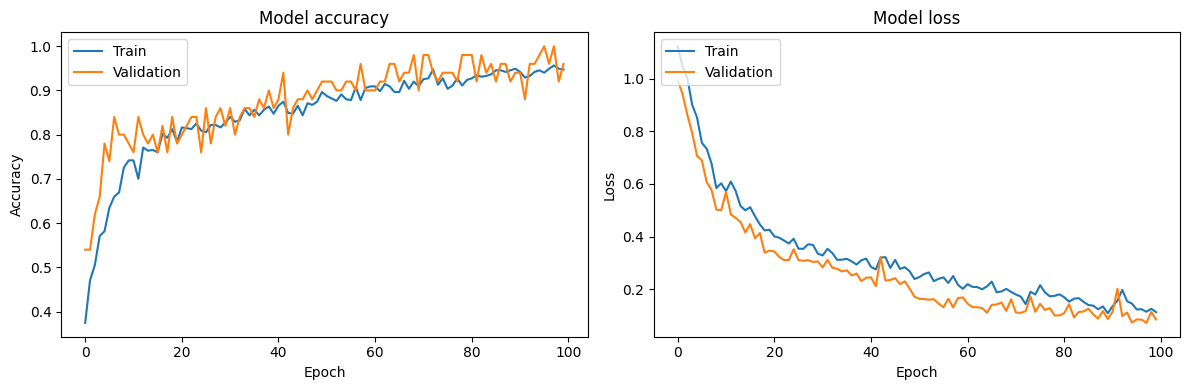

In [8]:
plt.figure(figsize=(12, 4))
dpi = 300

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()

plt.savefig("Loss_Accuracy_curve_try2_1.pdf", dpi=dpi)
plt.show()

3/3 [==============================] - 1s 177ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        24
           1       0.85      0.88      0.87        26
           2       0.88      0.84      0.86        25

    accuracy                           0.87        75
   macro avg       0.87      0.87      0.87        75
weighted avg       0.87      0.87      0.87        75



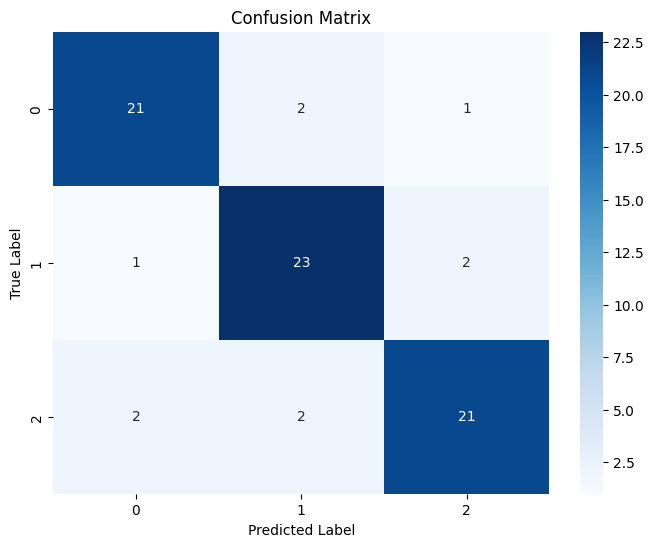

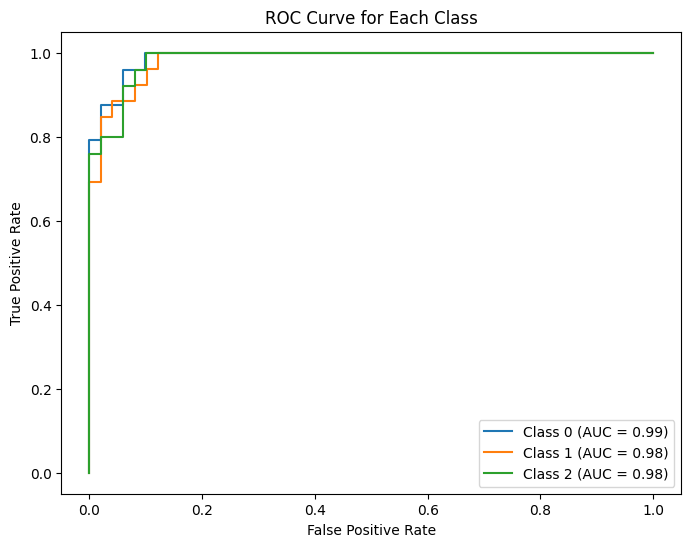

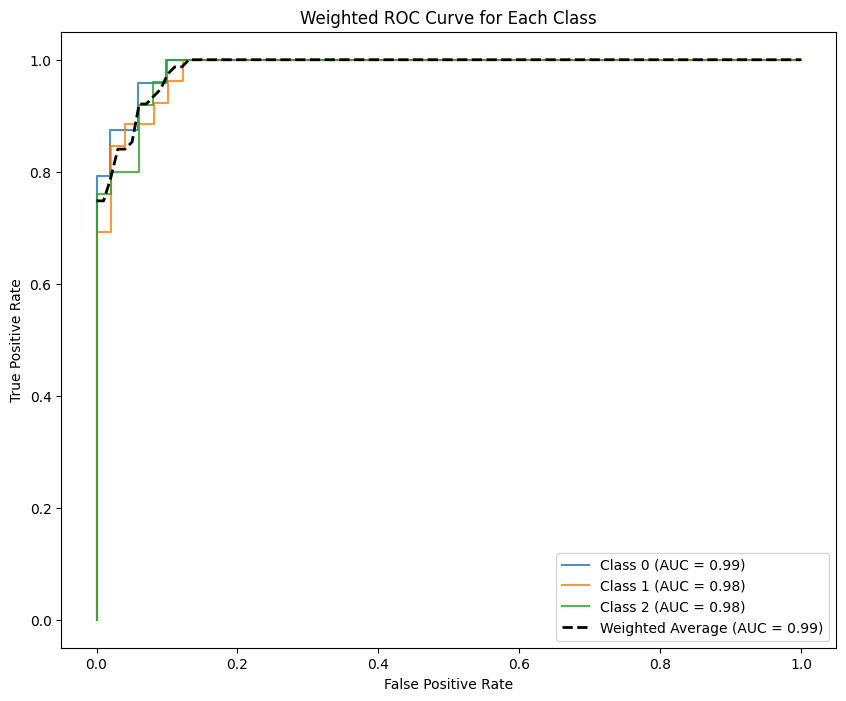

In [9]:
final_test_predictions = model.predict(final_test)

# Convert predictions to class labels
final_test_predictions_labels = np.argmax(final_test_predictions, axis=1)

# Convert true labels to class labels
final_true_labels = np.argmax(final_labels_reshaped, axis=1)

# Display classification report
classification_rep = classification_report(final_true_labels, final_test_predictions_labels)
print("Classification Report:")
print(classification_rep)


# Get unique class labels
class_labels = np.unique(final_true_labels)

# Compute confusion matrix
conf_matrix = confusion_matrix(final_true_labels, final_test_predictions_labels, labels=class_labels)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


# Get unique class labels
class_labels = np.unique(final_true_labels)

# Calculate ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(len(class_labels)):
    fpr, tpr, _ = roc_curve(final_true_labels == class_labels[i], final_test_predictions[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {class_labels[i]} (AUC = {roc_auc:.2f})')

# Plot ROC curve for each class
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Each Class')
plt.legend()
plt.show()

# Get unique class labels
class_labels = np.unique(final_true_labels)

# Calculate ROC curve for each class
plt.figure(figsize=(10, 8))
all_fpr = []
mean_tpr = 0

for i in range(len(class_labels)):
    fpr, tpr, _ = roc_curve(final_true_labels == class_labels[i], final_test_predictions[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {class_labels[i]} (AUC = {roc_auc:.2f})', alpha=0.8)

    # Interpolate the ROC curve to get a common set of points
    mean_tpr += np.interp(np.linspace(0, 1, 100), fpr, tpr)

mean_tpr /= len(class_labels)

# Calculate weighted average of AUC
mean_auc = auc(np.linspace(0, 1, 100), mean_tpr)

# Plot weighted average ROC curve
plt.plot(np.linspace(0, 1, 100), mean_tpr, label=f'Weighted Average (AUC = {mean_auc:.2f})', linestyle='--', linewidth=2, color='black')

# Plot ROC curve for each class
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Weighted ROC Curve for Each Class')
plt.legend()
plt.show()

3/3 [==============================] - 0s 20ms/step
Classification Report:
              precision    recall  f1-score   support

     Neutral       0.88      0.88      0.88        24
    Positive       0.85      0.88      0.87        26
    Negative       0.88      0.84      0.86        25

    accuracy                           0.87        75
   macro avg       0.87      0.87      0.87        75
weighted avg       0.87      0.87      0.87        75



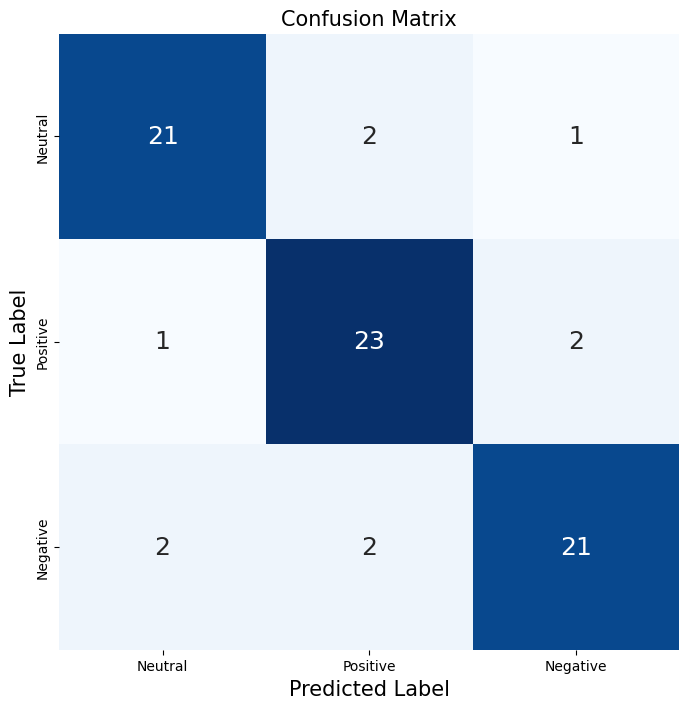

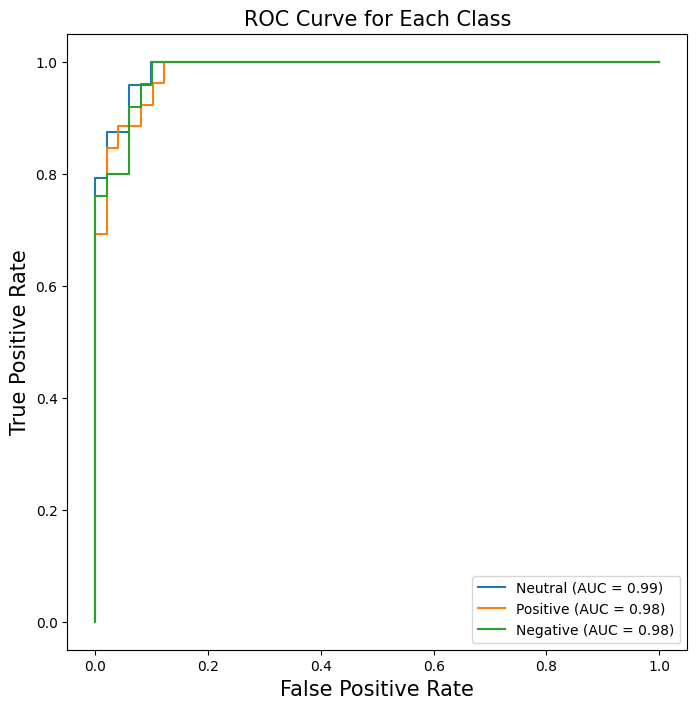

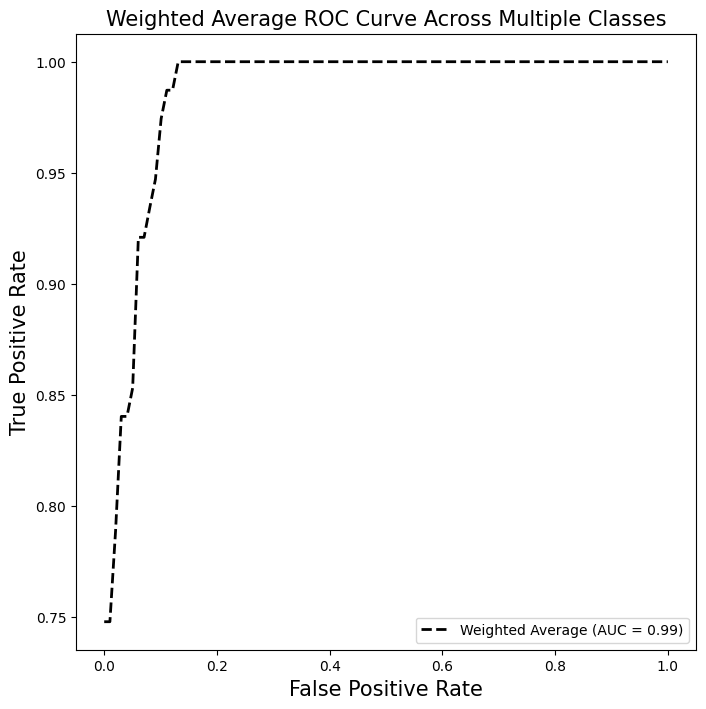

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# Assuming class label names are: Neutral, Positive, Negative
class_label_names = ['Neutral', 'Positive', 'Negative']

final_test_predictions = model.predict(final_test)

# Convert predictions to class labels
final_test_predictions_labels = np.argmax(final_test_predictions, axis=1)

# Convert true labels to class labels
final_true_labels = np.argmax(final_labels_reshaped, axis=1)

# Display classification report
classification_rep = classification_report(final_true_labels, final_test_predictions_labels, target_names=class_label_names)
print("Classification Report:")
print(classification_rep)

# Get unique class labels
class_labels = np.arange(len(class_label_names))

# Set the fixed value for image_number
image_number = 1.0

# Compute confusion matrix
conf_matrix = confusion_matrix(final_true_labels, final_test_predictions_labels, labels=class_labels)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_label_names, yticklabels=class_label_names, cbar=False, annot_kws={"size": 18})
plt.title("Confusion Matrix", fontsize=15)
plt.xlabel("Predicted Label", fontsize=15)
plt.ylabel("True Label", fontsize=15)
plt.savefig(f"confusion_matrix_{image_number}.jpg", dpi=300)  # Save the plot as JPG
plt.savefig(f"confusion_matrix_{image_number}.pdf")  # Save the plot as PDF
plt.show()

# Set the size for other plots
plot_size = (8, 8)

# Calculate ROC curve for each class
plt.figure(figsize=plot_size)
for i in range(len(class_labels)):
    fpr, tpr, _ = roc_curve(final_true_labels == class_labels[i], final_test_predictions[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{class_label_names[i]} (AUC = {roc_auc:.2f})')

# Plot ROC curve for each class
plt.xlabel('False Positive Rate', fontsize=15)
plt.ylabel('True Positive Rate', fontsize=15)
plt.title('ROC Curve for Each Class', fontsize=15)
plt.legend()
plt.savefig(f"roc_curve_class_{image_number}.jpg", dpi=300)  # Save the plot as JPG
plt.savefig(f"roc_curve_class_{image_number}.pdf")  # Save the plot as PDF
plt.show()

# Calculate ROC curve for each class and plot the weighted average ROC curve
plt.figure(figsize=plot_size)
all_fpr = []
mean_tpr = 0

for i in range(len(class_labels)):
    fpr, tpr, _ = roc_curve(final_true_labels == class_labels[i], final_test_predictions[:, i])
    roc_auc = auc(fpr, tpr)
    #plt.plot(fpr, tpr, label=f'{class_label_names[i]} (AUC = {roc_auc:.2f})', alpha=0.8)

    # Interpolate the ROC curve to get a common set of points
    mean_tpr += np.interp(np.linspace(0, 1, 100), fpr, tpr)

mean_tpr /= len(class_labels)

# Calculate weighted average of AUC
mean_auc = auc(np.linspace(0, 1, 100), mean_tpr)

# Plot weighted average ROC curve
plt.plot(np.linspace(0, 1, 100), mean_tpr, label=f'Weighted Average (AUC = {mean_auc:.2f})', linestyle='--', linewidth=2, color='black')

# Plot ROC curve for each class
plt.xlabel('False Positive Rate', fontsize=15)
plt.ylabel('True Positive Rate', fontsize=15)
plt.title('Weighted Average ROC Curve Across Multiple Classes', fontsize=15)
plt.legend()
plt.savefig(f"weighted_avg_roc_curve_{image_number}.jpg", dpi=300)  # Save the plot as JPG
plt.savefig(f"weighted_avg_roc_curve_{image_number}.pdf")  # Save the plot as PDF
plt.show()


In [11]:
model.save("model.h5")

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [12]:
train_features = model.predict(train_data)
test_features = model.predict(final_test)

3/3 [==============================] - 0s 21ms/step


In [13]:
scaler = StandardScaler()
train_features_std = scaler.fit_transform(train_features)
test_features_std = scaler.transform(test_features)

In [14]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Create a voting ensemble with uninitialized classifiers
ensemble_model = VotingClassifier(estimators=[
    ('svm', SVC(probability=True, random_state=42)),
    ('knn', KNeighborsClassifier()),
    ('rf', RandomForestClassifier(random_state=42)),
    ('dt', DecisionTreeClassifier(random_state=42)),
], voting='soft')  # 'soft' for probability voting

# Train the ensemble model
ensemble_model.fit(train_features_std, train_labels)

# Evaluate on the test set
ensemble_test_preds = ensemble_model.predict(test_features_std)
test_accuracy = accuracy_score(final_labels, ensemble_test_preds)
print('Ensemble Test Accuracy:', test_accuracy)

# Check if the ensemble accuracy is greater than 92
if test_accuracy > 0.92:
    print("Ensemble model with accuracy greater than 92 is trained.")
else:
    print("Ensemble model does not meet the desired accuracy threshold.")


Ensemble Test Accuracy: 0.8666666666666667
Ensemble model does not meet the desired accuracy threshold.


In [15]:
# Convert predictions to one-hot encoded format
final_true_labels_categorical = to_categorical(final_labels, num_classes=3)
final_test_preds_categorical = to_categorical(ensemble_test_preds, num_classes=3)

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        24
           1       0.85      0.88      0.87        26
           2       0.88      0.84      0.86        25

    accuracy                           0.87        75
   macro avg       0.87      0.87      0.87        75
weighted avg       0.87      0.87      0.87        75



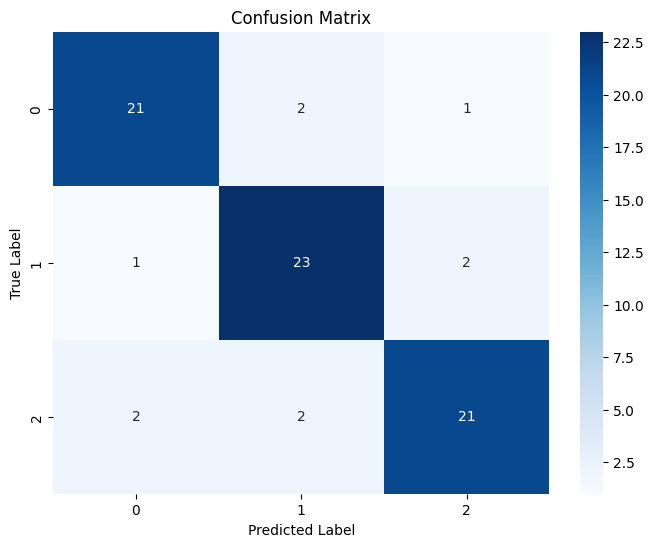

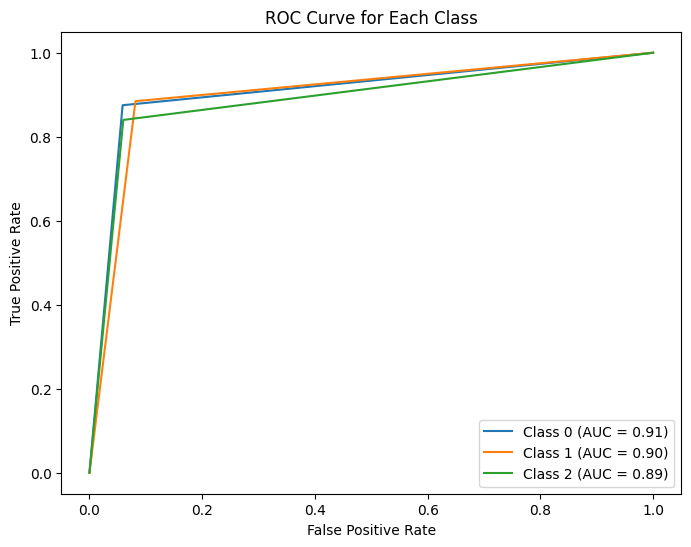

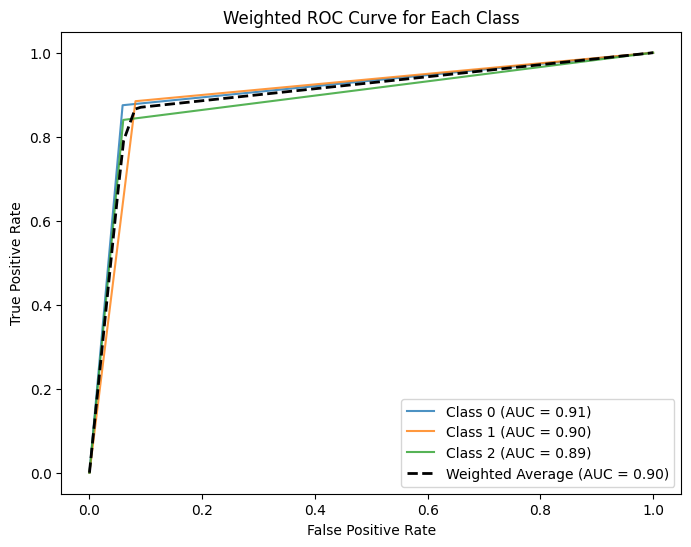

In [16]:
# Display classification report
classification_rep = classification_report(
    np.argmax(final_true_labels_categorical, axis=1),
    np.argmax(final_test_preds_categorical, axis=1)
)
print("Classification Report:")
print(classification_rep)

# Get unique class labels
class_labels = np.unique(np.argmax(final_true_labels_categorical, axis=1))

# Compute confusion matrix
conf_matrix = confusion_matrix(
    np.argmax(final_true_labels_categorical, axis=1),
    np.argmax(final_test_preds_categorical, axis=1),
    labels=class_labels
)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Calculate ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(len(class_labels)):
    fpr, tpr, _ = roc_curve(final_true_labels_categorical[:, i], final_test_preds_categorical[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {class_labels[i]} (AUC = {roc_auc:.2f})')

# Plot ROC curve for each class
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Each Class')
plt.legend()
plt.show()

# Calculate ROC curve for each class
plt.figure(figsize=(8, 6))
mean_tpr = 0.0
for i in range(len(class_labels)):
    fpr, tpr, _ = roc_curve(final_true_labels_categorical[:, i], final_test_preds_categorical[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {class_labels[i]} (AUC = {roc_auc:.2f})', alpha=0.8)

    # Interpolate the ROC curve to get a common set of points
    mean_tpr += np.interp(np.linspace(0, 1, 100), fpr, tpr)

mean_tpr /= len(class_labels)

# Calculate weighted average of AUC
mean_auc = auc(np.linspace(0, 1, 100), mean_tpr)

# Plot weighted average ROC curve
plt.plot(np.linspace(0, 1, 100), mean_tpr, label=f'Weighted Average (AUC = {mean_auc:.2f})', linestyle='--', linewidth=2, color='black')

# Plot ROC curve for each class
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Weighted ROC Curve for Each Class')
plt.legend()
plt.show()

Classification Report:
              precision    recall  f1-score   support

     Neutral       0.88      0.88      0.88        24
    Positive       0.85      0.88      0.87        26
    Negative       0.88      0.84      0.86        25

    accuracy                           0.87        75
   macro avg       0.87      0.87      0.87        75
weighted avg       0.87      0.87      0.87        75



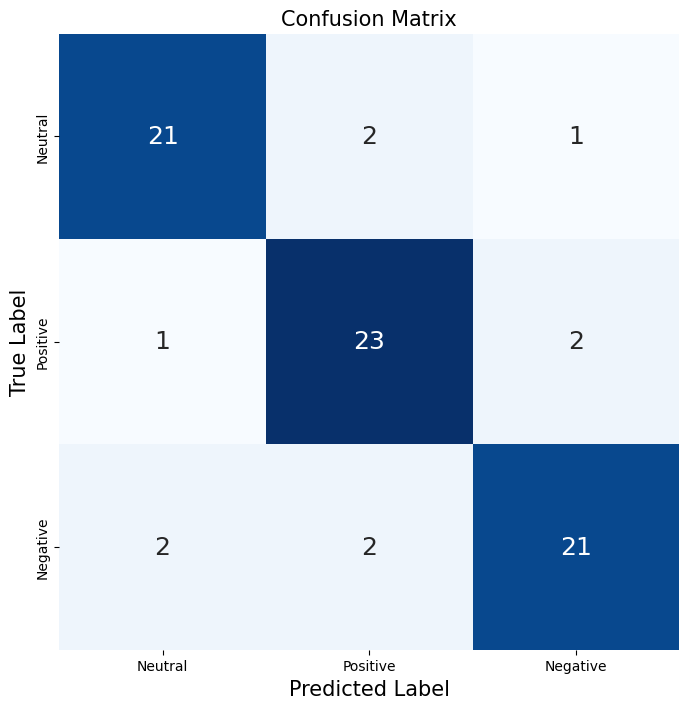

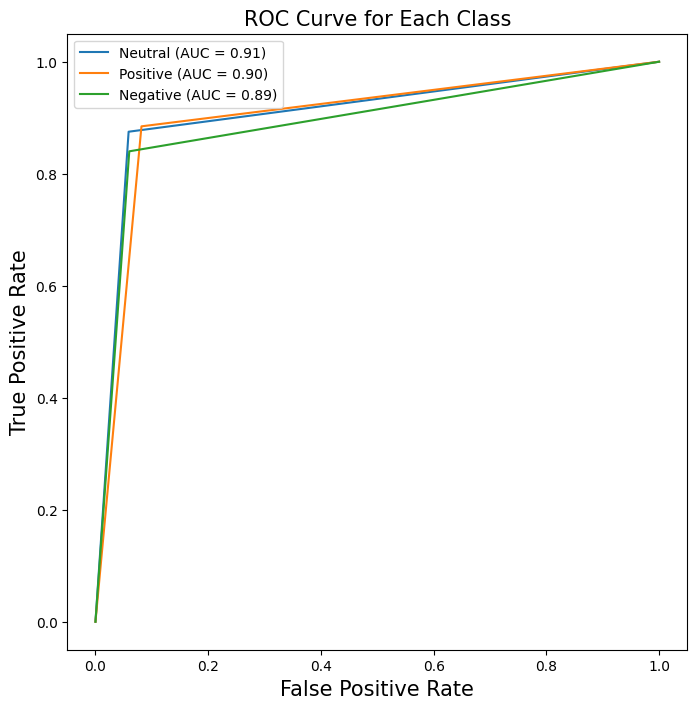

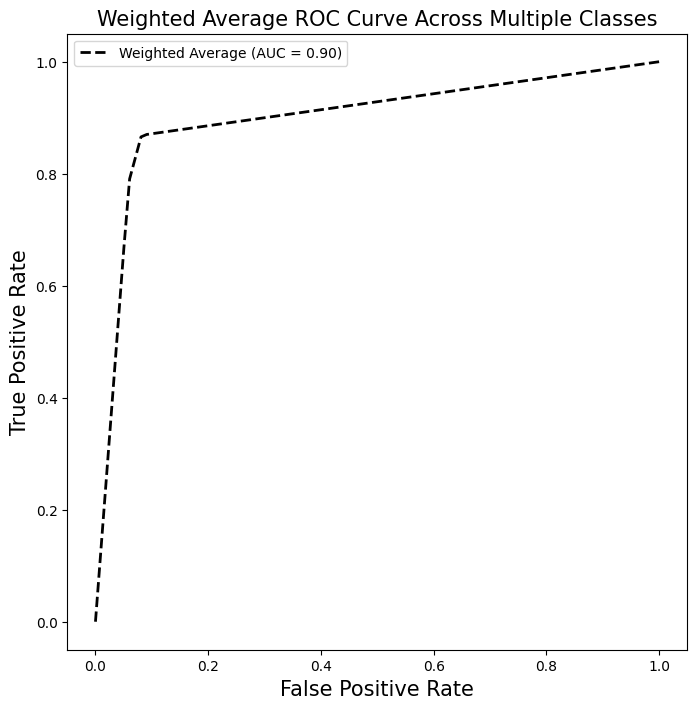

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# Assuming class label names are: 'Neutral', 'Positive', 'Negative'
class_label_names = ['Neutral', 'Positive', 'Negative']

# Display classification report
classification_rep = classification_report(
    np.argmax(final_true_labels_categorical, axis=1),
    np.argmax(final_test_preds_categorical, axis=1),
    target_names=class_label_names
)
print("Classification Report:")
print(classification_rep)

# Get unique class labels
class_labels = np.unique(np.argmax(final_true_labels_categorical, axis=1))

# Compute confusion matrix
conf_matrix = confusion_matrix(
    np.argmax(final_true_labels_categorical, axis=1),
    np.argmax(final_test_preds_categorical, axis=1),
    labels=class_labels
)

# Set the image_number variable
image_number = 1.1

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 8))
heatmap = sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_label_names, yticklabels=class_label_names, cbar=False, annot_kws={"size": 18})
plt.title("Confusion Matrix", fontsize=15)
plt.xlabel("Predicted Label", fontsize=15)
plt.ylabel("True Label", fontsize=15)

# Adjust font size inside the heatmap
for text in heatmap.texts:
    text.set_fontsize(18)

plt.savefig(f"confusion_matrix_{image_number}.jpg", dpi=300)
plt.savefig(f"confusion_matrix_{image_number}.pdf")
plt.show()

# Set the size for other plots
plot_size = (8, 8)

# Calculate ROC curve for each class
plt.figure(figsize=plot_size)
for i in range(len(class_labels)):
    fpr, tpr, _ = roc_curve(final_true_labels_categorical[:, i], final_test_preds_categorical[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{class_label_names[i]} (AUC = {roc_auc:.2f})')

# Plot ROC curve for each class
plt.xlabel('False Positive Rate', fontsize=15)
plt.ylabel('True Positive Rate', fontsize=15)
plt.title('ROC Curve for Each Class', fontsize=15)
plt.legend()
plt.savefig(f"roc_curve_class_{image_number}.jpg", dpi=300)
plt.savefig(f"roc_curve_class_{image_number}.pdf")
plt.show()

# Calculate ROC curve for each class
plt.figure(figsize=plot_size)
mean_tpr = 0.0
for i in range(len(class_labels)):
    fpr, tpr, _ = roc_curve(final_true_labels_categorical[:, i], final_test_preds_categorical[:, i])
    roc_auc = auc(fpr, tpr)
    #plt.plot(fpr, tpr, label=f'{class_label_names[i]} (AUC = {roc_auc:.2f})', alpha=0.8)

    # Interpolate the ROC curve to get a common set of points
    mean_tpr += np.interp(np.linspace(0, 1, 100), fpr, tpr)

mean_tpr /= len(class_labels)

# Calculate weighted average of AUC
mean_auc = auc(np.linspace(0, 1, 100), mean_tpr)

# Plot weighted average ROC curve
plt.plot(np.linspace(0, 1, 100), mean_tpr, label=f'Weighted Average (AUC = {mean_auc:.2f})', linestyle='--', linewidth=2, color='black')

# Plot ROC curve for each class
plt.xlabel('False Positive Rate', fontsize=15)
plt.ylabel('True Positive Rate', fontsize=15)
plt.title('Weighted Average ROC Curve Across Multiple Classes', fontsize=15)
plt.legend()
plt.savefig(f"weighted_roc_curve_{image_number}.jpg", dpi=300)
plt.savefig(f"weighted_roc_curve_{image_number}.pdf", dpi=300)
plt.show()
